<a href="https://colab.research.google.com/github/UdayGhorapade/Deep-learning/blob/main/Drowsiness_detection(accuracy)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [5]:
data_path = '/content/drive/MyDrive/dataset_new/train'

directories = ['/Closed', '/Open', '/no_yawn', '/yawn']

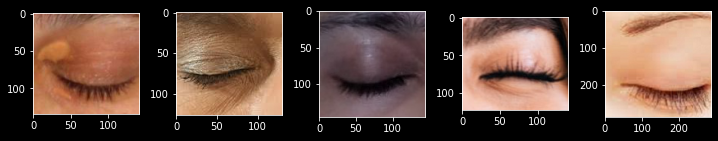

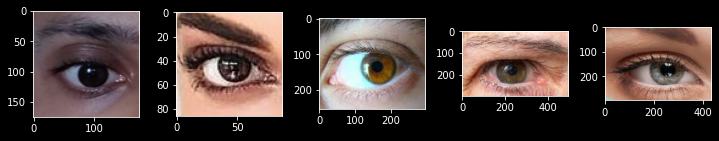

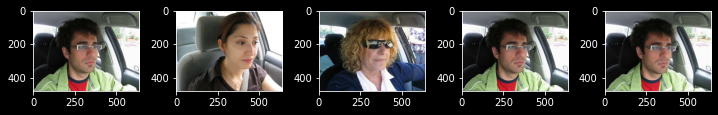

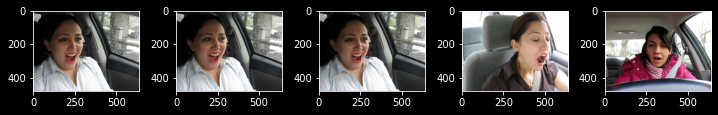

In [6]:
for j in directories:
    plot_imgs(data_path+j)

In [7]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_data_path = '/content/drive/MyDrive/dataset_new/train'
test_data_path = '/content/drive/MyDrive/dataset_new/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 2486 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [9]:
classes = 4

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

In [10]:
model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [12]:
model_path="yawn_detection1.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [13]:
num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [14]:
history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 1.2641 - accuracy: 0.3914 
Epoch 1: val_accuracy improved from -inf to 0.61458, saving model to yawn_detection1.h5
19/19 [==============================] - 573s 30s/step - loss: 1.2641 - accuracy: 0.3914 - val_loss: 0.9687 - val_accuracy: 0.6146
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.7281 - accuracy: 0.6896 
Epoch 2: val_accuracy improved from 0.61458 to 0.75260, saving model to yawn_detection1.h5
19/19 [==============================] - 317s 17s/step - loss: 0.7281 - accuracy: 0.6896 - val_loss: 0.5963 - val_accuracy: 0.7526
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.4888 - accuracy: 0.7676 
Epoch 3: val_accuracy improved from 0.75260 to 0.76302, saving model to yawn_detection1.h5
19/19 [==============================] - 318s 17s/step - loss: 0.4888 - accuracy: 0.7676 - val_loss: 0.5352 - val_accuracy: 0.7630
Epoch 4/10
19/19 [==============================] - 

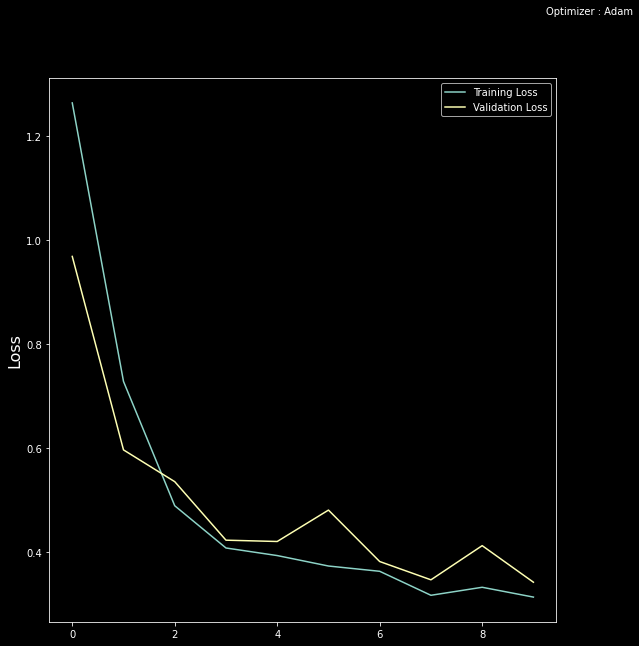

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')


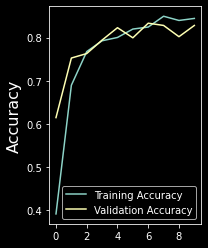

In [16]:
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()